In [130]:
import pandas as pd
import scipy.stats as stat

# Handling missing values
df = pd.read_csv('E:\\Others\\Datathon\'21\\Dataset\\data.csv')
print("Before handling")
print("No. of missing data:", df.isnull().sum().sum())

df = df.fillna(-1)
print("\nAfter substituting each missing data by -1")
print("No. of missing data:", df.isnull().sum().sum())

Before handling
No. of missing data: 34

After substituting each missing data by -1
No. of missing data: 0


In [131]:
# Finding number of students having different type of depression
dep_severity_types = ['Min', 'Mild', 'Mod', 'ModSev', 'Sev']
dep_sev_indices_by_type = [df.index[df['DepSev'] == dep_type] for dep_type in dep_severity_types]  # Students' indices list by depression severity

print("Number of students having different types of depression\n")
print("Minimal Depression:", len(dep_sev_indices_by_type[0]))
print("Mild Depression:", len(dep_sev_indices_by_type[1]))
print("Moderate Depression:", len(dep_sev_indices_by_type[2]))
print("Moderate Severe Depression:", len(dep_sev_indices_by_type[3]))
print("Severe Depression:", len(dep_sev_indices_by_type[4]))

Number of students having different types of depression

Minimal Depression: 65
Mild Depression: 107
Moderate Depression: 73
Moderate Severe Depression: 15
Severe Depression: 8


In [132]:
# Finding the percentage of male and female having depressive symptoms
dep_indices = df.index[df['Dep'] == 'Yes']  # Indices of the students having depression
non_dep_indices = df.index[df['Dep'] == 'No']

female_indices = df.index[df['Gender'] == 'Female']
male_indices = df.index[df['Gender'] == 'Male']
n_female = len(female_indices)
n_male = len(male_indices)

dep_female = dep_indices & female_indices  # Intersection operation to get the female students having depression
dep_male = dep_indices & male_indices

percent_female_dep = (len(dep_female) / n_female) * 100
percent_male_dep = (len(dep_male) / n_male) * 100

print(round(percent_female_dep, 2), "% female have depressive symptoms.")
print(round(percent_male_dep, 2), "% male have depressive symptoms.")

37.65 % female have depressive symptoms.
32.65 % male have depressive symptoms.


In [133]:
# This function will return a list containing percentage of male or female(depending on gender_indices) 
# students having each type of depression (from minimal to severe)
def get_percent_of_st_by_dep_type(gender_indices):
    indices_list_by_dep_type = [len(dep_sev_indices_by_type[0] & gender_indices),
                             len(dep_sev_indices_by_type[1] & gender_indices),
                             len(dep_sev_indices_by_type[2] & gender_indices),
                             len(dep_sev_indices_by_type[3] & gender_indices),
                             len(dep_sev_indices_by_type[4] & gender_indices)]
    percent_by_dep_type = [(n_dep/len(gender_indices))*100 for n_dep in indices_list_by_dep_type]
    return percent_by_dep_type

In [134]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_bar_chart(data_list1, data_list2, label_list, title, name_group1, name_group2):
    x_coordinates = np.arange(len(label_list))
    width = 0.2
    plt.title(title)
    plt.bar(x_coordinates, data_list1, label = name_group1, width=width, color='red')
    plt.bar(x_coordinates+width, data_list2, label = name_group2, width=width, color='gray')
    plt.xticks(x_coordinates+width, label_list)

    plt.legend()
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

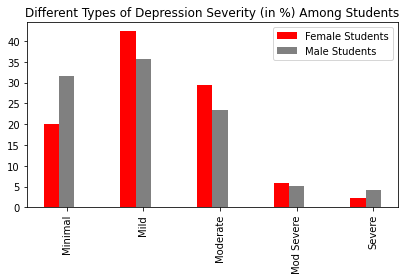

In [135]:
# Finding the type of depression, female participants are suffering from
female_per_dep_type = get_percent_of_st_by_dep_type(female_indices)  # Here, per and st are used to mean percentage and students respectively
male_per_dep_type = get_percent_of_st_by_dep_type(male_indices)
label_list = ['Minimal', 'Mild', 'Moderate', 'Mod Severe', 'Severe']
title = 'Different Types of Depression Severity (in %) Among Students'
visualize_bar_chart(female_per_dep_type, male_per_dep_type, label_list, title, 'Female Students', 'Male Students')

In [136]:
# Finding the participants (between the international and domestic students) who suffer from depression more
inter_st_indices = df.index[df['inter_dom'] == 'Inter']
dom_st_indices = df.index[df['inter_dom'] == 'Dom']

inter_dep_st = inter_st_indices & dep_indices
dom_dep_st = dom_st_indices & dep_indices

percent_inter_dep = 100 * (len(inter_dep_st) / len(inter_st_indices))
percent_dom_dep = 100 * (len(dom_dep_st) / len(dom_st_indices))

print(round(percent_inter_dep, 2), "% international students have depressive symptoms.")
print(round(percent_dom_dep, 2), "% domestic students have depressive symptoms.")

37.81 % international students have depressive symptoms.
29.85 % domestic students have depressive symptoms.


In [137]:
# How much do the graduate/undergraduate/international/domestic etc. students having depressive symptoms
# are willing to seek help from different types of people (e.g. friends, parents)?

seeking_sources = ['Partner_bi', 'Friends_bi', 'Parents_bi', 
                   'Relative_bi', 'Professional_bi', 'Phone_bi', 
                   'Doctor_bi', 'religion_bi', 'Alone_bi',
                   'Internet_bi', 'Others_bi']
def get_percent_of_supporters(group_indices): # Here, group_indices mean indices of a specific group of students having depressive symptoms 
    index_list_seek_sources = [df.index[df[source] == 'Yes'] for source in seeking_sources]
    percent_list = [(len(indices & group_indices)/len(group_indices))* 100 for indices in index_list_seek_sources]
    return percent_list

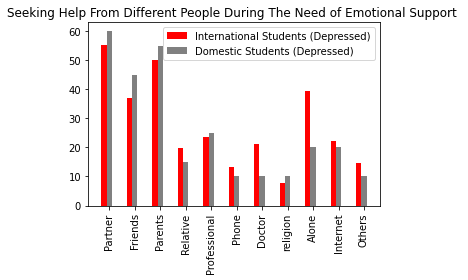

In [138]:
percent_list_inter_dep_seek = get_percent_of_supporters(inter_dep_st) # Percentage of the international students who are suffering from depression
percent_list_dom_dep_seek = get_percent_of_supporters(dom_dep_st)
label_list_seek_help = [source.replace('_bi', '') for source in seeking_sources]
title = 'Seeking Help From Different People During The Need of Emotional Support '
visualize_bar_chart(percent_list_inter_dep_seek, percent_list_dom_dep_seek, label_list_seek_help, title, 'International Students (Depressed)', 'Domestic Students (Depressed)')

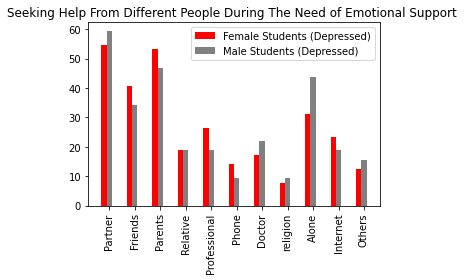

In [139]:
# Percentage of female & male having depressive sympotms, seeking help from differen sources when they emotional support
percent_list_female_dep_seek = get_percent_of_supporters(dep_female)
percent_list_male_dep_seek = get_percent_of_supporters(dep_male)
title = 'Seeking Help From Different People During The Need of Emotional Support '
visualize_bar_chart(percent_list_female_dep_seek, percent_list_male_dep_seek, label_list_seek_help, title, 'Female Students (Depressed)', 'Male Students (Depressed)')

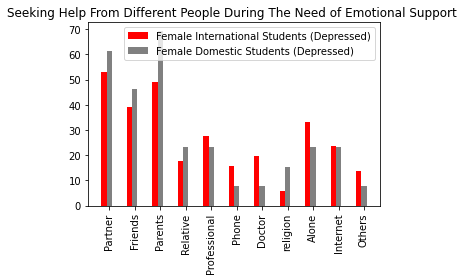

In [140]:
percent_list_inter_f_dep = get_percent_of_supporters(dep_female & inter_dep_st)
percent_list_dom_f_dep = get_percent_of_supporters(dep_female & dom_dep_st)
title = 'Seeking Help From Different People During The Need of Emotional Support '
visualize_bar_chart(percent_list_inter_f_dep, percent_list_dom_f_dep, label_list_seek_help, title, 'Female International Students (Depressed)', 'Female Domestic Students (Depressed)')

In [141]:
# This function will present the relation between two variables showing the trending line
import numpy as np
def visualize_relation(data_list1, data_list2, title, name_data1, name_data2):
    plt.xlabel(name_data1, fontweight='bold')
    plt.ylabel(name_data2, fontweight='bold')

    # Drawing trending line
    z = np.polyfit(data_list1, data_list2, 1)
    p = np.poly1d(z)
    plt.title(title)
    plt.plot(data_list1, data_list2, linestyle='-.', marker='o', color='red')
    plt.plot(data_list1, p(data_list1), "#666666", label='Trending line')
    plt.legend(loc='best')
    plt.show()

In [142]:
def detect_outlier_z_score(value_list):
    outliers_indices = []
    threshold = 3  # A previous study remarks to use this threshold to detect outliers
    mean = np.mean(value_list)
    std = np.std(value_list, ddof=1)

    index = 0
    for value in value_list:
        z_score = (value - mean) / std
        if np.abs(z_score) > threshold:
            outliers_indices.append(index)
        index += 1

    return outliers_indices

In [143]:
# Calculating correlation coefficient and significance level between two variables
import scipy.stats as stats
def calculate_correlation(data_list1, data_list2):
    
    n_outlier = len(detect_outlier_z_score(data_list1))
    n_outlier += len(detect_outlier_z_score(data_list2))

    normality, p_norm_data1 = stats.normaltest(data_list1)
    normality, p_norm_data2 = stats.normaltest(data_list2)

    if p_norm_data1 > 0.05 and p_norm_data2 > 0.05 and n_outlier == 0:  # If ture, this means data are normally distributed and do not have any outlier
        cc, cc_p_value = stats.pearsonr(data_list1, data_list2)  # Pearson correlation
        r_text = "r="
    else:
        cc, cc_p_value = stats.spearmanr(data_list1, data_list2)  # Spearman correlation
        r_text = "rs="

    return r_text, cc, cc_p_value

In [144]:
# Finding difference between different groups of students
def calculate_difference(group1_data, group2_data):
    normality, p_value_norm_g1 = stats.normaltest(group1_data)
    normality, p_value_norm_g2 = stats.normaltest(group2_data)

    if p_value_norm_g1 > 0.05 and p_value_norm_g2 > 0.05:  # If ture, this means data are normally distributed
        value, p_vlaue_eq_variance = stats.bartlett(group1_data, group2_data)  # Here, value is the test statistic's value, calculated using a formula
        if p_vlaue_eq_variance > 0.05:  # If ture, this means both groups have equal variance  
            stats_value, comp_test_p_value = stats.ttest_ind(group1_data, group2_data, equal_var=True)
            test_name = "Standard T test"
        else:
            stats_value, comp_test_p_value = stats.ttest_ind(group1_data, group2_data, equal_var=False)
            test_name = "Welch's T Test"
    else:
        stats_value, comp_test_p_value = stats.mannwhitneyu(group1_data, group2_data, alternative='two-sided')
        test_name = "Mann Whitney U Test"
        
    return test_name, stats_value, comp_test_p_value

In [145]:
# This is a dictionary that will be used to find the full meaning of the abbreviated word. Abbreviated words are used as column names
abbr_expan_map = {'Jap': 'japanese proficiency score', # Self evaluated
                  'Eng': 'english proficiency score', # Self evaluated
                  'ToDep': 'depression score',
                  'ToSC': 'social connectedness score',
                  'APD': 'perceived discrimination score',
                  'AHome': 'homesickness score',
                  'APH': 'perceived hatred score',
                  'Afear': 'fear score',
                  'ACS': 'culture shock score',
                  'AGuilt': 'guilt score',
                  'AMiscell': 'miscellaneous score',
                  'ToAS': 'acculturative stress', 
                  'Partner': 'willingness to seek help from an intimate partner during emotional difficulties', 
                  'Friends': 'willingness to seek help from friends during emotional difficulties', 
                  'Parents': 'willingness to seek help from parents during emotional difficulties', 
                  'Profess': 'willingness to seek help from professionals during emotional difficulties', 
                  'Phone': 'willingness to seek help from phone line during emotional difficulties', 
                  'Doctor': 'willingness to seek help from doctors during emotional difficulties', 
                  'Reli': 'willingness to seek help from religious leaders during emotional difficulties', 
                  'Alone': 'willingness to solve problem by themselves during emotional difficulties', 
                  'Others': 'Willingness to seek help from other sources during emotional difficulties', 
                  'Internet': 'Willingness to seek help from Internet during emotional difficulties'}

In [146]:
# Finding correlation of different variables with depression score 
# Also finding difference between students having depressive symptoms and students having no depressive symptoms

def find_correlation_difference(group_indices, name_group):  # Here, group_indices will contain the index of the participants on which we are interested
    print('Currently, working on', name_group, '. Sample size:', len(group_indices), "\n\n")
    for column_name in df.columns:
        if str(df[column_name].dtype) != 'object' and column_name != 'ToDep':
            data_list1 = df[column_name][group_indices]
            data_list2 = df['ToDep'][group_indices]  # ToDep column contains the depression score
            data_list1, data_list2 = zip(*sorted(zip(data_list1, data_list2)))

            # Finding correlation
            r_text, cc, p_value_cc = calculate_correlation(data_list1, data_list2)
            str_cc = r_text + str(round(cc, 2)) + ", p=" + str(p_value_cc)
            name_var2 = 'depression score'
            if column_name in abbr_expan_map:
                name_var1 = abbr_expan_map[column_name]
            else:
                name_var1 = column_name

            if p_value_cc < 0.05:  # If this condition is true, this means the correlation is significant. 
                # However, to be more precise, one will need to adjust (using FDR or other methods) p values (to control false positive) for multiple correlation
                title = 'Relation between '+ name_var1 + ' and '+ name_var2 + ', considering '+name_group
                print(title)
                print(str_cc)
                visualize_relation(data_list1, data_list2, title, name_var1, name_var2)

            # Finding difference
            group_dep_indices = dep_indices & group_indices
            group_non_dep_indices = non_dep_indices & group_indices
            group_dep_data_list = df[column_name][group_dep_indices]
            group_non_dep_data_list = df[column_name][group_non_dep_indices]
            test_name, stats_value, p_value_comp = calculate_difference(group_dep_data_list, group_non_dep_data_list)
            if p_value_comp < 0.05: # If this condition is true, this means the difference is significant. 
                # However, to be more precise, one will need to adjust (using FDR or other methods) p values (to control false positive) for multiple comparison
                print("Difference between depressed students' ", name_var1, " and non-depressed students' "+name_var1)
                print("Mean (Depressed):", np.mean(group_dep_data_list), "Vs Mean (Non-depressed):", np.mean(group_non_dep_data_list))
                print(test_name+", Stat value: " +str(stats_value) + ", p=" + str(p_value_comp), "\n")

Currently, working on all students . Sample size: 268 


Relation between social connectedness score and depression score, considering all students
rs=-0.51, p=2.2664438496606733e-19


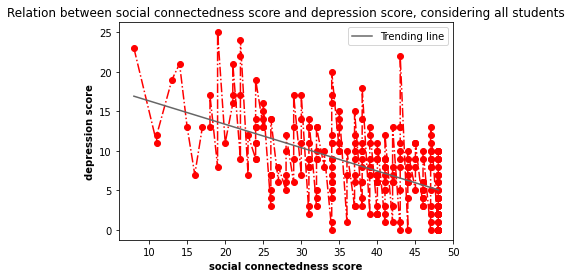

Difference between depressed students'  social connectedness score  and non-depressed students' social connectedness score
Mean (Depressed): 32.479166666666664 Vs Mean (Non-depressed): 40.26162790697674
Mann Whitney U Test, Stat value: 4467.0, p=4.205115495794135e-10 

Relation between perceived discrimination score and depression score, considering all students
rs=0.37, p=2.2489449161910726e-10


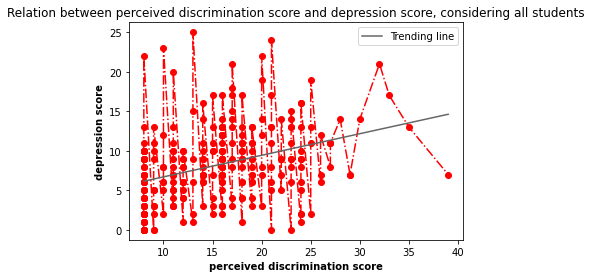

Difference between depressed students'  perceived discrimination score  and non-depressed students' perceived discrimination score
Mean (Depressed): 17.270833333333332 Vs Mean (Non-depressed): 14.377906976744185
Mann Whitney U Test, Stat value: 10592.5, p=0.00011228063318623327 

Relation between homesickness score and depression score, considering all students
rs=0.17, p=0.004064766979889769


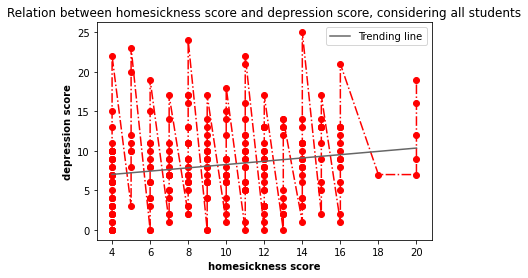

Relation between perceived hatred score and depression score, considering all students
rs=0.34, p=1.6196275949766165e-08


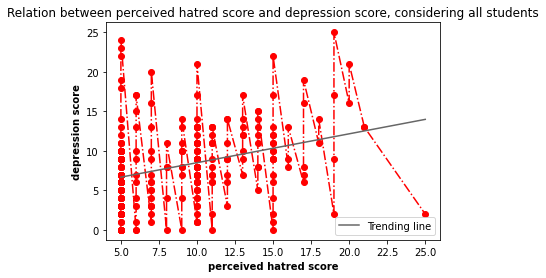

Difference between depressed students'  perceived hatred score  and non-depressed students' perceived hatred score
Mean (Depressed): 10.427083333333334 Vs Mean (Non-depressed): 8.418604651162791
Mann Whitney U Test, Stat value: 10571.5, p=9.560972360839858e-05 

Relation between fear score and depression score, considering all students
rs=0.39, p=3.320828877072475e-11


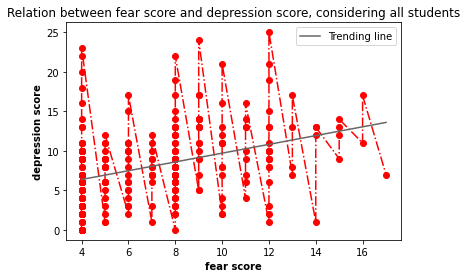

Difference between depressed students'  fear score  and non-depressed students' fear score
Mean (Depressed): 8.1875 Vs Mean (Non-depressed): 6.738372093023256
Mann Whitney U Test, Stat value: 10556.5, p=0.00011521456926332856 

Relation between culture shock score and depression score, considering all students
rs=0.29, p=1.1522428353891939e-06


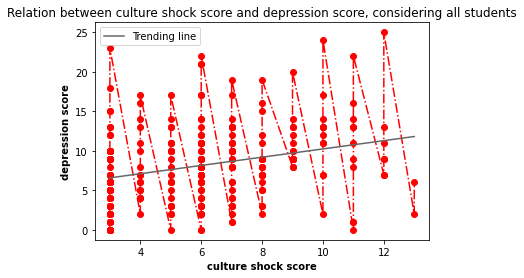

Difference between depressed students'  culture shock score  and non-depressed students' culture shock score
Mean (Depressed): 6.666666666666667 Vs Mean (Non-depressed): 5.726744186046512
Mann Whitney U Test, Stat value: 9989.5, p=0.003843000730360388 

Relation between guilt score and depression score, considering all students
rs=0.31, p=3.393535185126605e-07


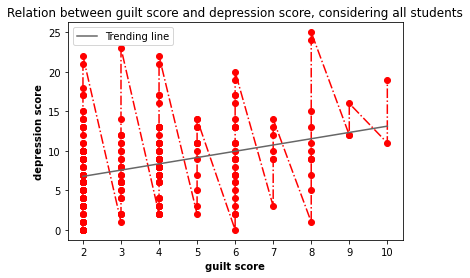

Relation between miscellaneous score and depression score, considering all students
rs=0.34, p=9.56169676790348e-09


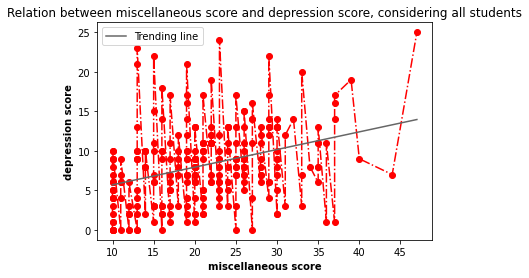

Difference between depressed students'  miscellaneous score  and non-depressed students' miscellaneous score
Mean (Depressed): 23.541666666666668 Vs Mean (Non-depressed): 19.761627906976745
Mann Whitney U Test, Stat value: 10685.0, p=6.402061669321608e-05 

Relation between acculturative stress and depression score, considering all students
rs=0.43, p=1.1359713957773416e-13


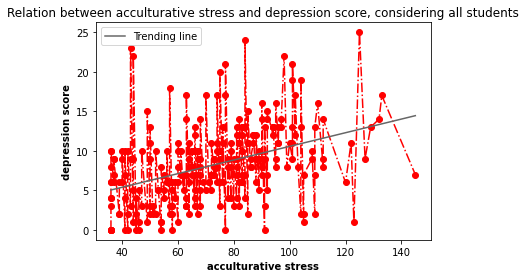

Difference between depressed students'  acculturative stress  and non-depressed students' acculturative stress
Mean (Depressed): 80.45833333333333 Vs Mean (Non-depressed): 67.87209302325581
Mann Whitney U Test, Stat value: 11126.0, p=2.3892672074825465e-06 

Difference between depressed students'  willingness to seek help from friends during emotional difficulties  and non-depressed students' willingness to seek help from friends during emotional difficulties
Mean (Depressed): 3.75 Vs Mean (Non-depressed): 4.238372093023256
Mann Whitney U Test, Stat value: 7052.5, p=0.04506167040617345 

Relation between willingness to seek help from parents during emotional difficulties and depression score, considering all students
rs=-0.13, p=0.02774210855641778


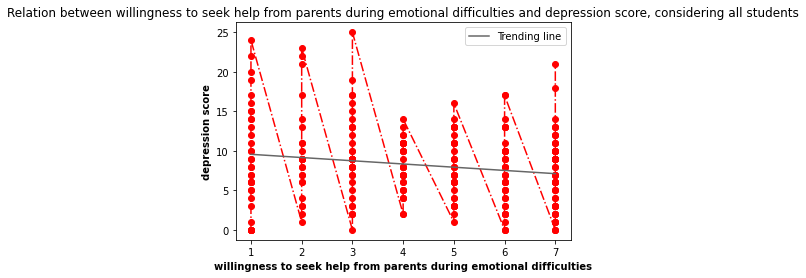

Difference between depressed students'  Relative  and non-depressed students' Relative
Mean (Depressed): 2.7291666666666665 Vs Mean (Non-depressed): 3.261627906976744
Mann Whitney U Test, Stat value: 6812.0, p=0.015535626770433849 

Relation between willingness to solve problem by themselves during emotional difficulties and depression score, considering all students
rs=0.27, p=6.999940373186316e-06


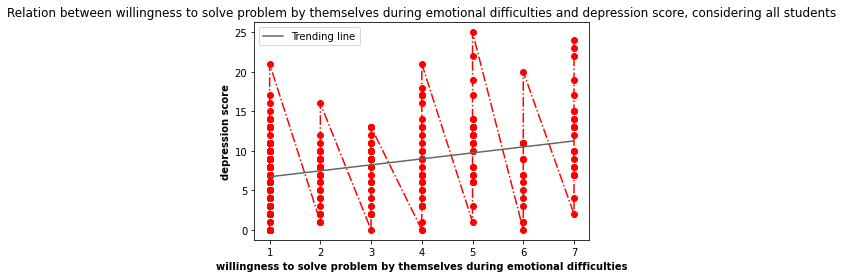

Difference between depressed students'  willingness to solve problem by themselves during emotional difficulties  and non-depressed students' willingness to solve problem by themselves during emotional difficulties
Mean (Depressed): 3.4791666666666665 Vs Mean (Non-depressed): 2.63953488372093
Mann Whitney U Test, Stat value: 10028.5, p=0.0025623074432449162 

Relation between Willingness to seek help from other sources during emotional difficulties and depression score, considering all students
rs=0.21, p=0.0006822718238045376


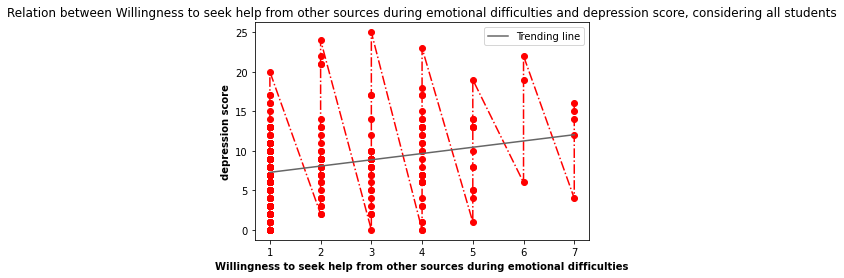

Difference between depressed students'  Willingness to seek help from other sources during emotional difficulties  and non-depressed students' Willingness to seek help from other sources during emotional difficulties
Mean (Depressed): 2.5 Vs Mean (Non-depressed): 1.941860465116279
Mann Whitney U Test, Stat value: 9494.0, p=0.026595679730672183 

Relation between Willingness to seek help from Internet during emotional difficulties and depression score, considering all students
rs=0.28, p=2.670759862058136e-06


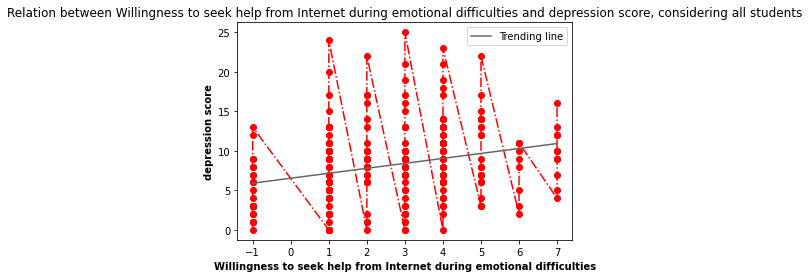

Difference between depressed students'  Willingness to seek help from Internet during emotional difficulties  and non-depressed students' Willingness to seek help from Internet during emotional difficulties
Mean (Depressed): 2.9583333333333335 Vs Mean (Non-depressed): 2.447674418604651
Standard T test, Stat value: 1.9926219928694975, p=0.047324666911919056 



In [147]:
# Finding correlation and difference, considering every student ''
find_correlation_difference(df.index.values, "all students")

Currently, working on only female students . Sample size: 170 


Relation between Stay and depression score, considering only female students
rs=0.19, p=0.015371479530658637


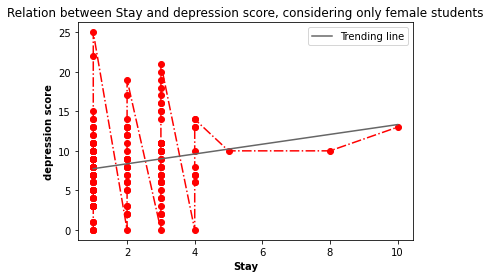

Relation between social connectedness score and depression score, considering only female students
rs=-0.52, p=5.740442958133189e-13


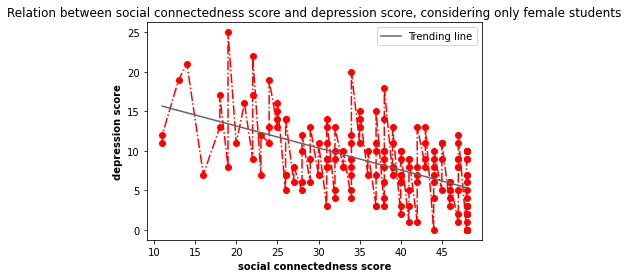

Difference between depressed students'  social connectedness score  and non-depressed students' social connectedness score
Mean (Depressed): 32.125 Vs Mean (Non-depressed): 40.0377358490566
Mann Whitney U Test, Stat value: 1775.5, p=1.8772222996989293e-07 

Relation between perceived discrimination score and depression score, considering only female students
rs=0.41, p=3.8944893697803633e-08


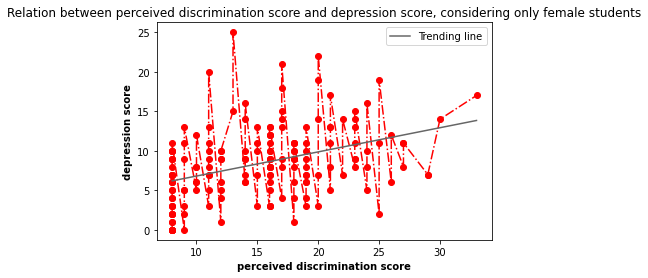

Difference between depressed students'  perceived discrimination score  and non-depressed students' perceived discrimination score
Mean (Depressed): 17.125 Vs Mean (Non-depressed): 14.018867924528301
Mann Whitney U Test, Stat value: 4485.0, p=0.00040701276027246786 

Relation between homesickness score and depression score, considering only female students
rs=0.15, p=0.04365898937109043


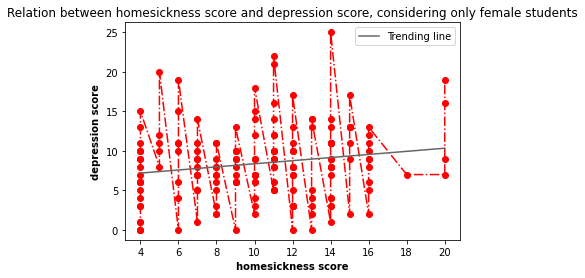

Relation between perceived hatred score and depression score, considering only female students
rs=0.37, p=7.790007031978413e-07


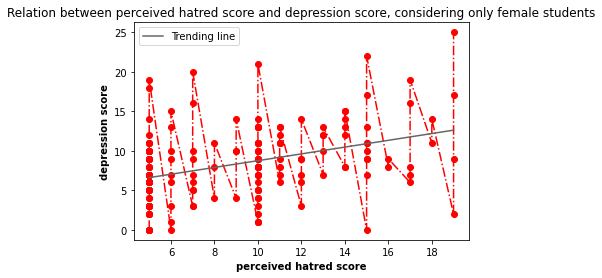

Difference between depressed students'  perceived hatred score  and non-depressed students' perceived hatred score
Mean (Depressed): 10.4375 Vs Mean (Non-depressed): 8.39622641509434
Mann Whitney U Test, Stat value: 4430.0, p=0.0006305604469429134 

Relation between fear score and depression score, considering only female students
rs=0.4, p=6.209228777805309e-08


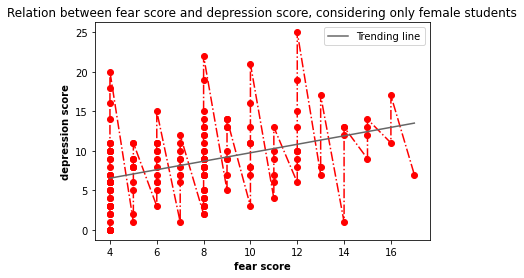

Difference between depressed students'  fear score  and non-depressed students' fear score
Mean (Depressed): 8.5 Vs Mean (Non-depressed): 6.839622641509434
Mann Whitney U Test, Stat value: 4442.5, p=0.0005887701399232319 

Relation between culture shock score and depression score, considering only female students
rs=0.28, p=0.0002609686908870834


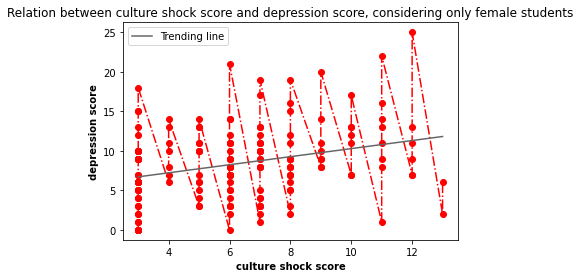

Difference between depressed students'  culture shock score  and non-depressed students' culture shock score
Mean (Depressed): 7.0 Vs Mean (Non-depressed): 5.886792452830188
Mann Whitney U Test, Stat value: 4214.0, p=0.007411324472785393 

Relation between guilt score and depression score, considering only female students
rs=0.33, p=8.467042424362389e-06


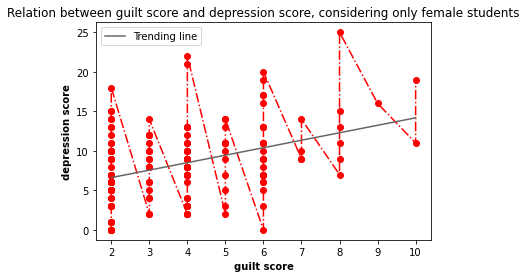

Difference between depressed students'  guilt score  and non-depressed students' guilt score
Mean (Depressed): 4.34375 Vs Mean (Non-depressed): 3.6132075471698113
Mann Whitney U Test, Stat value: 4061.5, p=0.026480348923985035 

Relation between miscellaneous score and depression score, considering only female students
rs=0.38, p=2.757686843528536e-07


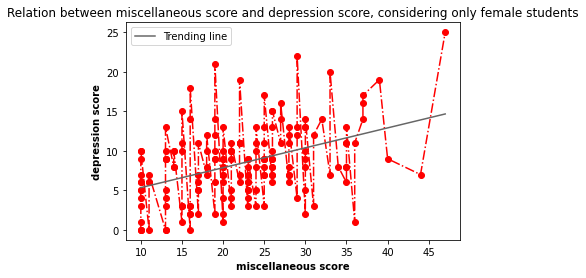

Difference between depressed students'  miscellaneous score  and non-depressed students' miscellaneous score
Mean (Depressed): 25.0 Vs Mean (Non-depressed): 20.37735849056604
Standard T test, Stat value: 3.907044510486849, p=0.00013521102640919947 

Relation between acculturative stress and depression score, considering only female students
rs=0.46, p=2.443998738914079e-10


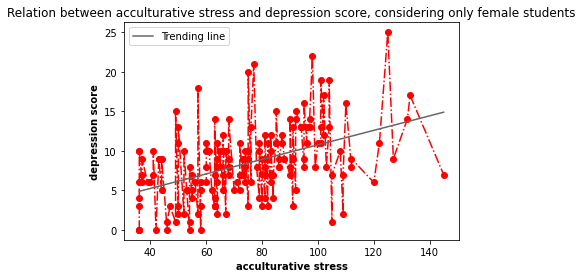

Difference between depressed students'  acculturative stress  and non-depressed students' acculturative stress
Mean (Depressed): 83.15625 Vs Mean (Non-depressed): 68.9622641509434
Mann Whitney U Test, Stat value: 4730.5, p=1.675897948063908e-05 

Relation between willingness to seek help from parents during emotional difficulties and depression score, considering only female students
rs=-0.2, p=0.008780931135895407


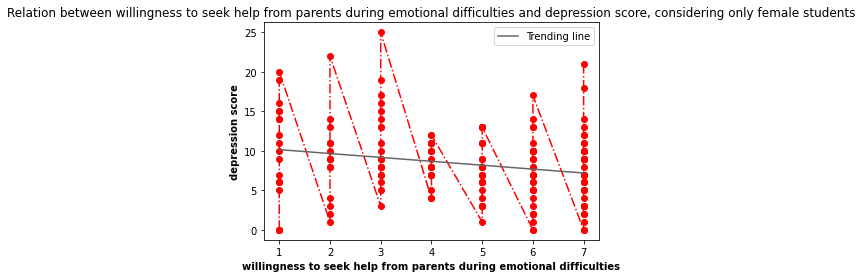

Relation between Relative and depression score, considering only female students
rs=-0.17, p=0.024983657738000223


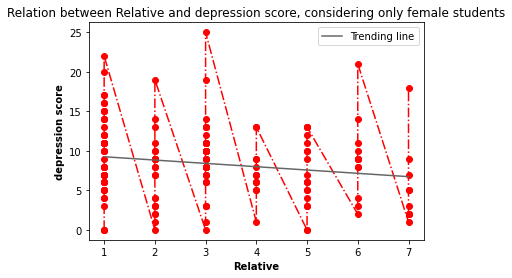

Relation between willingness to solve problem by themselves during emotional difficulties and depression score, considering only female students
rs=0.25, p=0.0008035669979783091


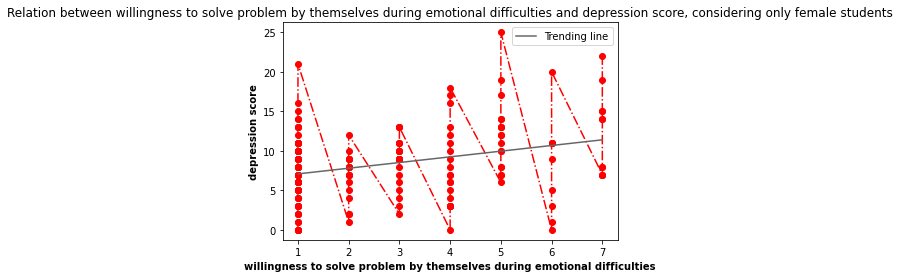

Difference between depressed students'  willingness to solve problem by themselves during emotional difficulties  and non-depressed students' willingness to solve problem by themselves during emotional difficulties
Mean (Depressed): 3.265625 Vs Mean (Non-depressed): 2.5660377358490565
Mann Whitney U Test, Stat value: 4059.5, p=0.025777670194299475 

Relation between Willingness to seek help from other sources during emotional difficulties and depression score, considering only female students
rs=0.21, p=0.006911546856486498


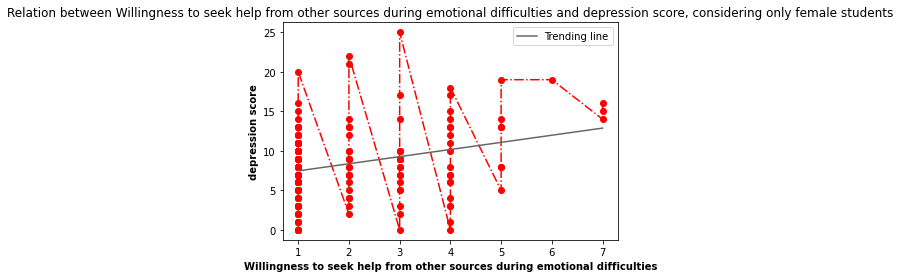

Difference between depressed students'  Willingness to seek help from other sources during emotional difficulties  and non-depressed students' Willingness to seek help from other sources during emotional difficulties
Mean (Depressed): 2.421875 Vs Mean (Non-depressed): 1.8018867924528301
Mann Whitney U Test, Stat value: 3951.5, p=0.04701613838583207 

Relation between Willingness to seek help from Internet during emotional difficulties and depression score, considering only female students
rs=0.24, p=0.0014826734710095644


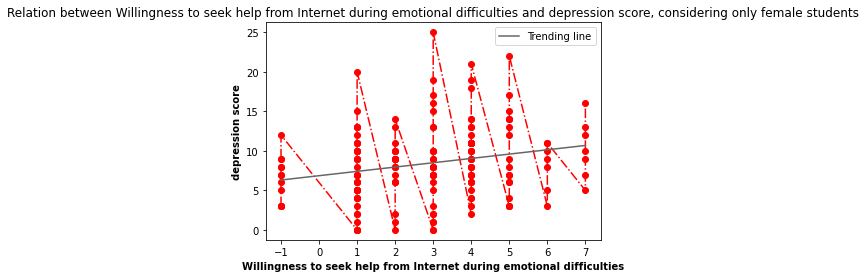

In [148]:
# Finding correlation and difference, considering only the female students
find_correlation_difference(female_indices, 'only female students')

Currently, working on only female international students . Sample size: 128 


Relation between Stay and depression score, considering only female international students
rs=0.26, p=0.003404843330771284


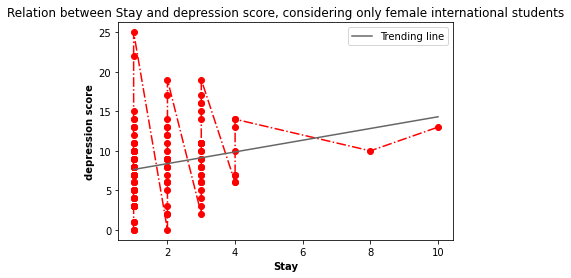

Difference between depressed students'  Stay  and non-depressed students' Stay
Mean (Depressed): 2.3529411764705883 Vs Mean (Non-depressed): 1.7272727272727273
Mann Whitney U Test, Stat value: 2413.5, p=0.018669440231763937 

Relation between social connectedness score and depression score, considering only female international students
rs=-0.51, p=9.216258546559808e-10


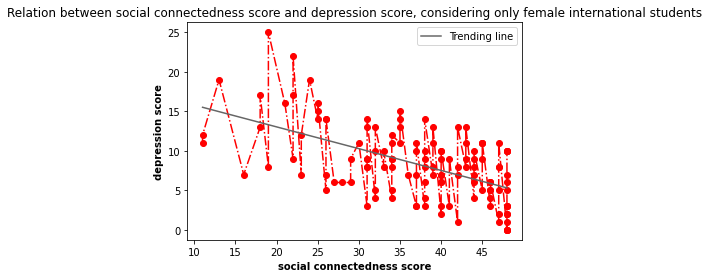

Difference between depressed students'  social connectedness score  and non-depressed students' social connectedness score
Mean (Depressed): 32.254901960784316 Vs Mean (Non-depressed): 40.02597402597402
Mann Whitney U Test, Stat value: 1029.5, p=5.309956027216416e-06 

Relation between perceived discrimination score and depression score, considering only female international students
rs=0.45, p=1.4171874669203254e-07


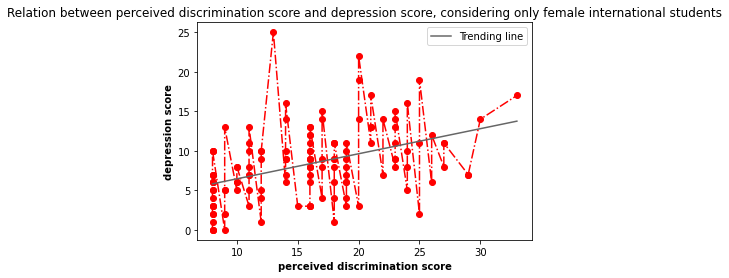

Difference between depressed students'  perceived discrimination score  and non-depressed students' perceived discrimination score
Mean (Depressed): 17.88235294117647 Vs Mean (Non-depressed): 14.766233766233766
Mann Whitney U Test, Stat value: 2557.0, p=0.0037439864059762105 

Relation between perceived hatred score and depression score, considering only female international students
rs=0.41, p=1.489822263316962e-06


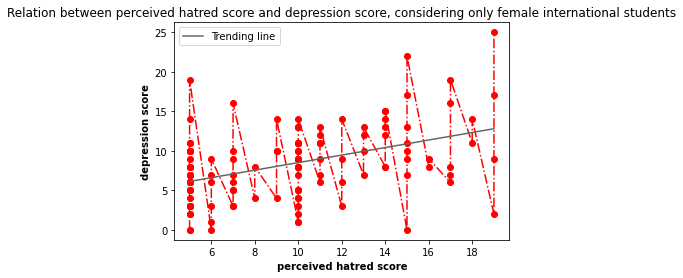

Difference between depressed students'  perceived hatred score  and non-depressed students' perceived hatred score
Mean (Depressed): 10.92156862745098 Vs Mean (Non-depressed): 8.883116883116884
Mann Whitney U Test, Stat value: 2534.0, p=0.00480365928692789 

Relation between fear score and depression score, considering only female international students
rs=0.43, p=4.891427730090417e-07


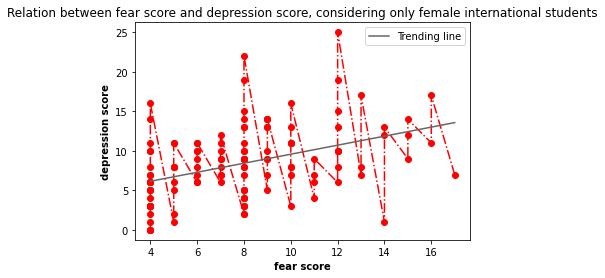

Difference between depressed students'  fear score  and non-depressed students' fear score
Mean (Depressed): 8.549019607843137 Vs Mean (Non-depressed): 7.441558441558442
Mann Whitney U Test, Stat value: 2391.5, p=0.035166168614622684 

Relation between culture shock score and depression score, considering only female international students
rs=0.26, p=0.0026166121667156703


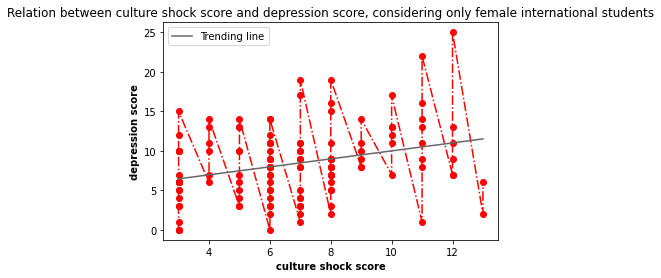

Relation between guilt score and depression score, considering only female international students
rs=0.34, p=0.0001079548909347703


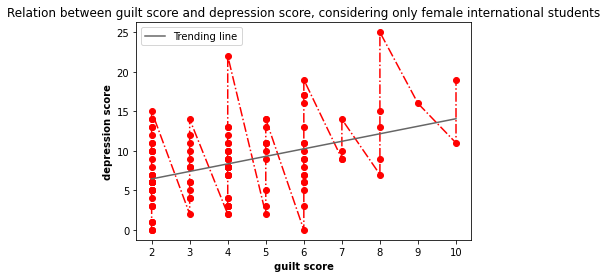

Relation between miscellaneous score and depression score, considering only female international students
rs=0.4, p=3.4627760061445577e-06


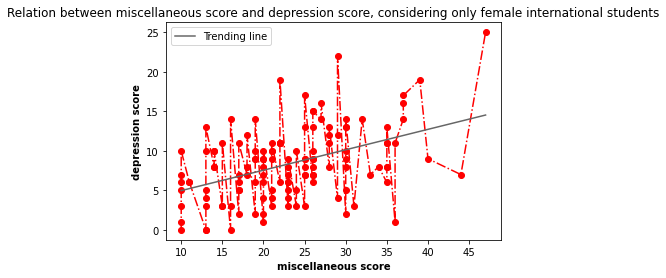

Difference between depressed students'  miscellaneous score  and non-depressed students' miscellaneous score
Mean (Depressed): 25.725490196078432 Vs Mean (Non-depressed): 21.441558441558442
Standard T test, Stat value: 3.1291744455751913, p=0.002178414367915213 

Relation between acculturative stress and depression score, considering only female international students
rs=0.5, p=1.5144537754248634e-09


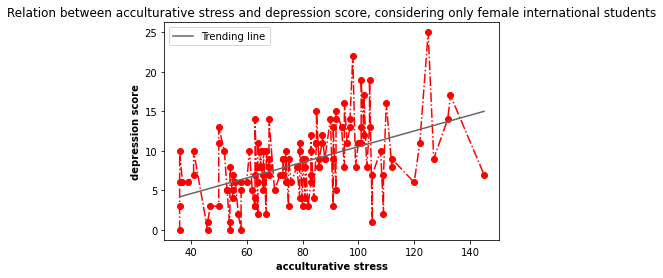

Difference between depressed students'  acculturative stress  and non-depressed students' acculturative stress
Mean (Depressed): 85.62745098039215 Vs Mean (Non-depressed): 73.27272727272727
Standard T test, Stat value: 3.075262032739106, p=0.00257962881374098 

Relation between willingness to seek help from parents during emotional difficulties and depression score, considering only female international students
rs=-0.25, p=0.004866106659123583


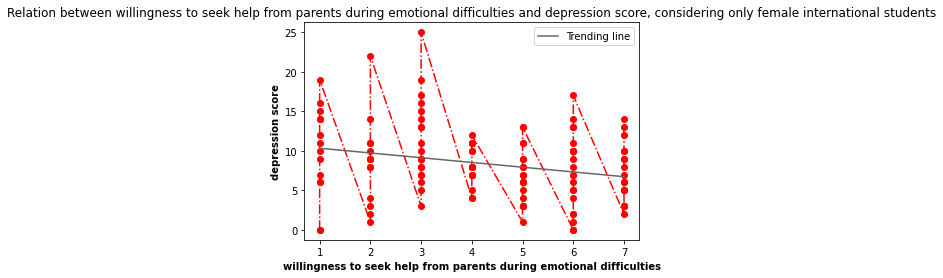

Relation between Relative and depression score, considering only female international students
rs=-0.23, p=0.009186267267600046


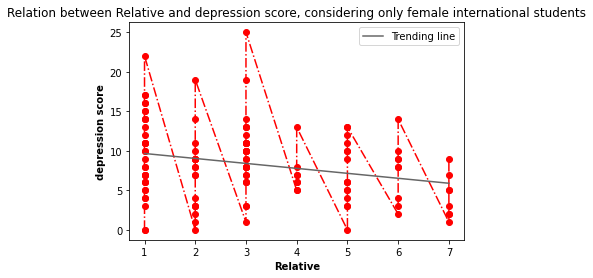

Relation between willingness to solve problem by themselves during emotional difficulties and depression score, considering only female international students
rs=0.25, p=0.004922839050037715


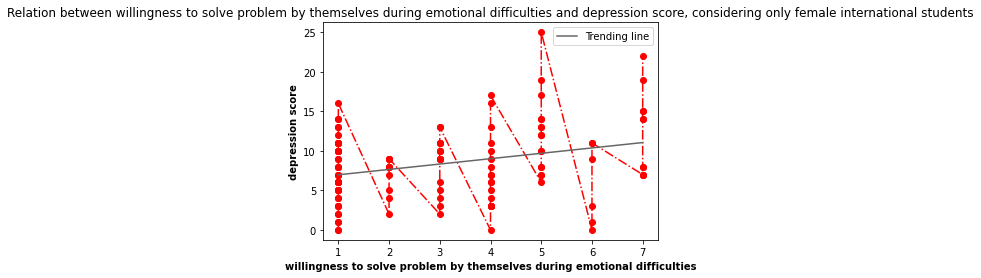

Relation between Willingness to seek help from other sources during emotional difficulties and depression score, considering only female international students
rs=0.22, p=0.014078973550469356


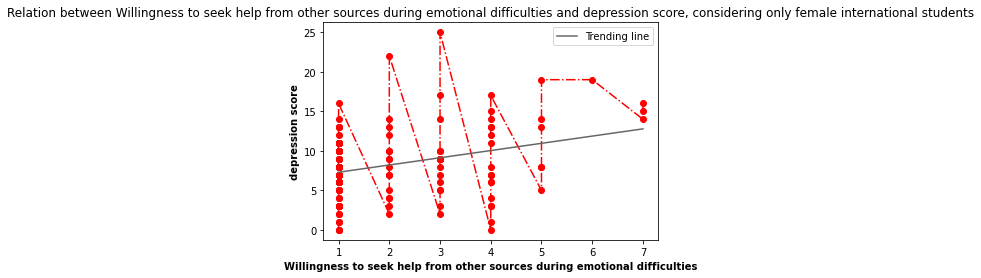

Relation between Willingness to seek help from Internet during emotional difficulties and depression score, considering only female international students
rs=0.26, p=0.002508998740254372


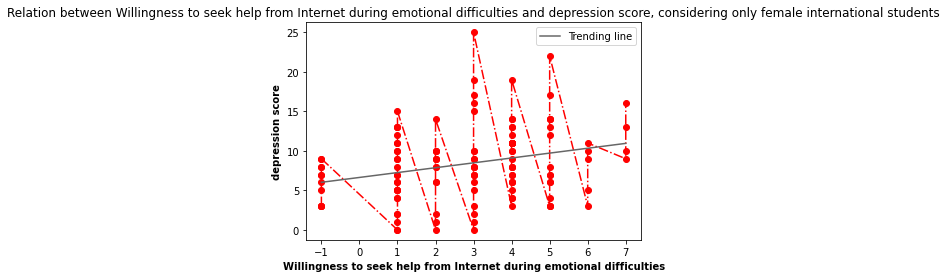

In [149]:
# Considering only the female international students
find_correlation_difference(female_indices & inter_st_indices, 'only female international students')